python packages

In [1]:
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

Scipy packages

In [2]:
import scipy.stats as ss
from collections import Counter

<b>PROBLEM</b>

* The problem in investing on a company is that sometimes the company doesn’t deliver what it is promised, ending up in wasting investor’s capital.

<b>GOAL</b>

* To create a model that can be used both by investors and individuals alike who are interested in either backing up a single product or investing a huge sum of capital on companies listed in Kickstarter by predicting the chances of success based on Kickstarter data.


<b>Feature Selection</b>

according to our previous analysis, i will remove (drop) name, country, deadline, and launched as the four least associated with state.
on top of that, i will also remove category. despite category have a moderate association with state, encoding category is going to slow down computations, and I will use main_category as the feature to represent the whole category..

and since there are two features that are relatively having strong association with the target variable, I will choose to drop usd_pledged_real over backers. backers could represent itself  as a variable, white usd_pledged_real could only represent if the number of amount of a certain campaign divided with the number of campaigners to get the average money pledged per person. while it is still unfair because every campaign will set their product at a different prices per package. (a USD200 gadget could be considered affordable compared to a USD100 table napkin)

backers need to be kept because backers are the backbone and cannot be parted with any crowdfunding platform like Kickstarter and any other similar platform (Indiegogo and KitaBisa for example). Backers also could reflect the success of the campaigner's marketing campaign of their product.

In [3]:
df = pd.read_csv('2state.csv',index_col=0)

In [4]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

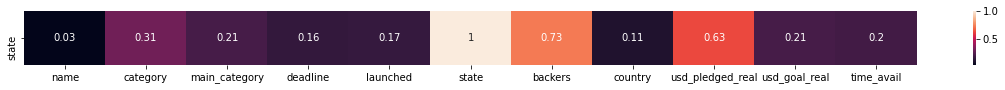

In [5]:
asosiasi_cramers_v = []
for i in list(df.columns):
    x = round((cramers_v(df['state'], df[i])),2)
    asosiasi_cramers_v.append(x)
    
data = pd.DataFrame(data=[asosiasi_cramers_v], columns=list(df.columns), index=['state'])
plt.figure(figsize=(20,1))
sns.heatmap(data, annot=True)

In [6]:
df.drop(columns=['name','category','deadline','launched','country','usd_pledged_real'],inplace=True)

In [7]:
df

,main_category,state,backers,usd_goal_real,time_avail
ID,,,,,
1000002330,Publishing,failed,0,1533.95,58
1000003930,Film & Video,failed,15,30000.00,59
1000004038,Film & Video,failed,3,45000.00,44
1000007540,Music,failed,1,5000.00,29
1000014025,Food,successful,224,50000.00,34
...,...,...,...,...,...
999975836,Food,failed,4,6500.00,29
999977640,Film & Video,failed,5,1500.00,26
999986353,Film & Video,failed,1,15000.00,45


<b>Value Encoding</b>

to be able to make sklearn run without any problems, categorical values will be replaced with numerical categories.
here are some notes:

state                           0= failed, 1= success <br>
main_category_Art               0= no, 1= yes<br>
main_category_Comics            0= no, 1= yes<br>
main_category_Crafts            0= no, 1= yes<br>
main_category_Dance             0= no, 1= yes<br>
main_category_Design            0= no, 1= yes<br>
main_category_Fashion           0= no, 1= yes<br>
main_category_Film & Video      0= no, 1= yes<br>
main_category_Food              0= no, 1= yes<br>
main_category_Games             0= no, 1= yes<br>
main_category_Journalism        0= no, 1= yes<br>
main_category_Music             0= no, 1= yes<br>
main_category_Photography       0= no, 1= yes<br>
main_category_Publishing        0= no, 1= yes<br>
main_category_Technology        0= no, 1= yes<br>
main_category_Theater           0= no, 1= yes<br>

In [8]:
df['state'] = df['state'].replace(['failed'],0)
df['state'] = df['state'].replace(['successful'],1)
df = pd.get_dummies(data=df, columns=['main_category'])
df.dtypes

state                           int64
backers                         int64
usd_goal_real                 float64
time_avail                      int64
main_category_Art               uint8
main_category_Comics            uint8
main_category_Crafts            uint8
main_category_Dance             uint8
main_category_Design            uint8
main_category_Fashion           uint8
main_category_Film & Video      uint8
main_category_Food              uint8
main_category_Games             uint8
main_category_Journalism        uint8
main_category_Music             uint8
main_category_Photography       uint8
main_category_Publishing        uint8
main_category_Technology        uint8
main_category_Theater           uint8
dtype: object

In [9]:
df.to_csv('ready2.csv')